<a href="https://colab.research.google.com/github/cstecker/student/blob/main/btw2021_wkr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Pakete
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**Setup**

In [14]:
# Daten laden
download.file("https://github.com/cstecker/student/blob/main/btw2021_wkr.rds?raw=true", "wkr.rds")

wkr_results2 <- readRDS("wkr.rds")



# Parteifarben definieren
party_colors <- c("CDU" = "black", "CSU" = "black", "SPD" = "#E3000F", 
                  "FDP" = "#FFD600", "GRÜNE" = "#32CD32", "DIE LINKE" = "deeppink", 
                  "AfD" = "blue")



**Daten inspizieren**

In [ ]:
# Blick auf den gesamten Datensatz
wkr_results2

In [16]:
# Blick auf einzelne Wahlkreise
wkr_results2 %>% 
  filter(wkr_name == "Darmstadt") %>% 
  select(wkr_nr, wkr_name, candidate, party, v1_2021, v2_2021, rank)

wkr_nr,wkr_name,candidate,party,v1_2021,v2_2021,rank
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
186,Darmstadt,"Larem, Andreas",SPD,27.377261,26.345253,1
186,Darmstadt,"Wagner, Daniela",GRÜNE,23.793536,22.434074,2
186,Darmstadt,"Dr. Mannes, Astrid",CDU,22.713913,18.426118,3
186,Darmstadt,"Dr. von Buttlar, Julia",FDP,9.220504,11.899822,4
186,Darmstadt,"Ehtemai, Meysam",AfD,6.012206,6.519879,5
186,Darmstadt,"Turğut-Wenzel, Fırat",DIE LINKE,5.004987,5.755287,6


**Grafische Inspektion**

In [ ]:
# Balkendiagramm
wkr_results2 %>% 
  filter(wkr_name == "Darmstadt") %>% 
  select(wkr_nr, wkr_name, candidate, party, v1_2021, v2_2021, rank) %>% 
  ggplot(aes(x = candidate, y = v1_2021)) +
  geom_col() +
  coord_flip()

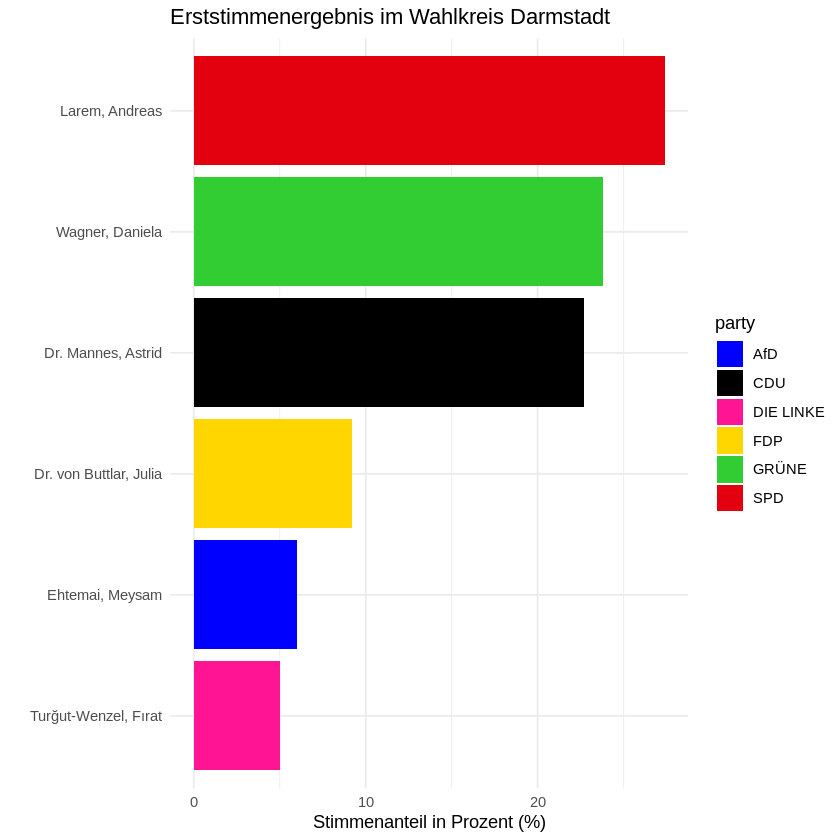

In [18]:
# schöneres Balkendiagramm
wkr_results2 %>% 
  filter(wkr_name == "Darmstadt") %>% 
  select(wkr_nr, wkr_name, candidate, party, v1_2021, v2_2021, rank) %>% 
  ggplot(aes(x = reorder(candidate, desc(rank)), y = v1_2021, fill = party)) +
  geom_col() +
  scale_fill_manual(values = party_colors) +
  labs(title = "Erststimmenergebnis im Wahlkreis Darmstadt", 
       x = "", 
       y = "Stimmenanteil in Prozent (%)") +
  theme_minimal() +
  coord_flip()


In [ ]:

# wer sind die Wahlkreisköniginnen und -könige?
wkr_results2 %>% 
  select(wkr_name, wkr_nr, party, candidate, ErstSt = v1_2021, ZweitSt = v2_2021, 
         partydiff) %>% 
  arrange(desc(partydiff))

In [ ]:
# Erststimmenanteil der Wahlkreissieger
wkr_results2 %>% 
  filter(rank == 1) %>% 
  ggplot(aes(x = party, y = v1_2021, fill = party, col = party, alpha = .3)) +
  geom_hline(yintercept = 50) +
  geom_boxplot() +
  geom_jitter(width = .2) +
  scale_fill_manual("", values = party_colors) +
  scale_color_manual("", values = party_colors) +
  labs(
    title = "Erststimmenanteile der Wahlkreissieger",
    x = ""
  ) +
  guides(fill = FALSE, alpha = FALSE, color = FALSE) +
  labs(y = "") +
  theme_minimal() 


In [ ]:
# Wer wäre für die CSU nicht eingezogen
# https://www.bundeswahlleiter.de/service/glossar/u/ueberhangmandate.html
wkr_results2 %>% 
  filter(party == "CSU", rank == 1) %>% 
  arrange(desc(v1_2021)) %>% 
  select(wkr_nr, wkr_name, candidate, v1_2021) %>% 
  print(n = 45)